# T & T LAB (06)
## Name : Sudip Chakrabarty
## Roll : 21053329
## Sec : CSE-34
## Date : 16.03.24

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
iris = load_iris()

In [3]:
print("Features names : ", iris.feature_names)
print("Target names : ",iris.target_names)
print("Number of Samples : ",len(iris.data))
print("Features matrix shape : ",iris.data.shape)

Features names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names :  ['setosa' 'versicolor' 'virginica']
Number of Samples :  150
Features matrix shape :  (150, 4)


In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
missing_values = df.isnull().sum().sum()
missing_values

0

In [5]:
X_test,X_train,y_test,y_train = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [6]:
print("Training set shape - Features:", X_train.shape, "Labels:", y_train.shape)
print("Testing set shape - Features:", X_test.shape, "Labels:", y_test.shape)

Training set shape - Features: (30, 4) Labels: (30,)
Testing set shape - Features: (120, 4) Labels: (120,)


In [7]:
X_train

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2]])

In [8]:
#Decision tree
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test,dt_y_pred)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Classification Report:")
print(classification_report(y_test, dt_y_pred, target_names=iris.target_names))

Decision Tree Classifier Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.91      0.95      0.93        41
   virginica       0.95      0.90      0.92        39

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [9]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("\nRandom Forest Classifier Accuracy:", rf_accuracy)
print("Classification Report:")
print(classification_report(y_test, rf_y_pred, target_names=iris.target_names))


Random Forest Classifier Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.95      0.95        41
   virginica       0.95      0.95      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [10]:
# Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("\nSupport Vector Machine (SVM) Classifier Accuracy:", svm_accuracy)
print("Classification Report:")
print(classification_report(y_test, svm_y_pred, target_names=iris.target_names))


Support Vector Machine (SVM) Classifier Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.85      0.90        41
   virginica       0.86      0.95      0.90        39

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120



In [11]:
results = {}
results[0] = dt_accuracy
results[1] = rf_accuracy
results[2] = svm_accuracy

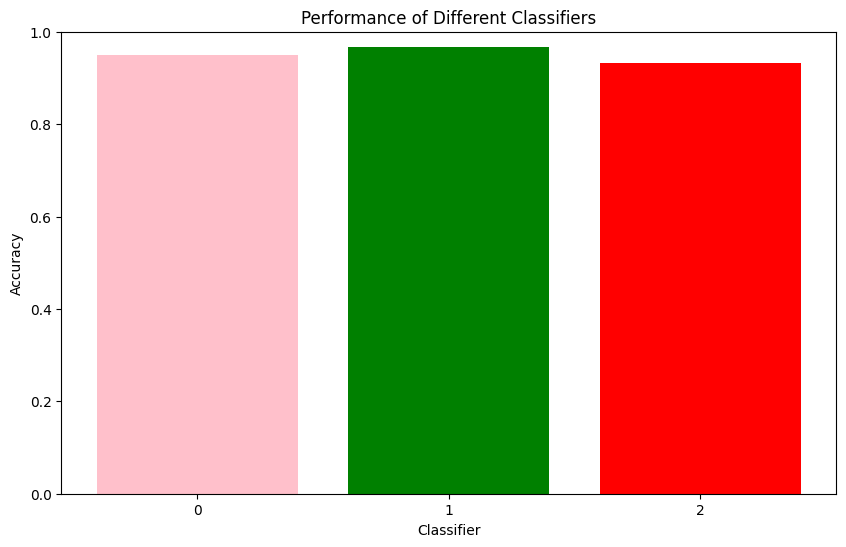

In [12]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(results)), list(results.values()), align='center', color=['pink', 'green', 'red'])
plt.xticks(np.arange(len(results)), list(results.keys()))
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Performance of Different Classifiers')
plt.ylim([0, 1])
plt.show()